In [76]:
# %pip install missingno
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
import missingno as msno
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
%matplotlib inline

In [77]:
!pip install vaderSentiment

In [78]:
try:
  df=pd.read_csv("complaints.csv", encoding="utf-8")
except UnicodeDecodeError:
  df=pd.read_csv("complaints.csv", encoding="ISO-8859-1")

In [79]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,FactorTrust run by XXXX have another consumer ...,NaN,Factor Trust,OH,44708,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059212
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"To Whom It May Concern, I purchased an XXXX a...",NaN,GOLDMAN SACHS BANK USA,CA,92308,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059423
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"Hello, My name is XXXX XXXX. \n\nI am trying t...",NaN,SN SERVICING CORPORATION,MD,208XX,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7055447
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance with the fair credit Reporting ac...,NaN,"EQUIFAX, INC.",OH,44224,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7054855
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I reviewed my Consumer Reports and noticed tha...,NaN,"EQUIFAX, INC.",FL,33186,NaN,Consent provided,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42754,8/14/23,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,I had called and talked to one of the customer...,Company believes the complaint provided an opp...,MoneyLion Inc.,UT,84117,Servicemember,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7395621
42755,8/14/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,The following Inquiries are NOT mine and i nev...,Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",NJ,070XX,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7393478
42756,8/14/23,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,"XXXX XXXX XXXX XXXX or XXXX XXXX XXXX, XXXX. ...",Company believes it acted appropriately as aut...,"P&B Capital Group, LLC",NC,27455,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7399997
42757,8/15/23,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,I took out a personal loan with XXXX XXXX and ...,Company believes it acted appropriately as aut...,"LDF Holdings, LLC",MD,20602,NaN,Consent provided,Web,8/15/23,Closed with explanation,Yes,NaN,7402347


#Solution 1:

In [80]:
# Profiling the data given in order to identify fields with the missing values
print("Fields with the missing values are:")
print(df.isnull().sum())

Fields with the missing values are:
Date received                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                        2534
Consumer complaint narrative        0
Company public response         12839
Company                             0
State                             119
ZIP code                            0
Tags                            38216
Consumer consent provided?          0
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              42759
Complaint ID                        0
dtype: int64


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42759 entries, 0 to 42758
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 42759 non-null  object 
 1   Product                       42759 non-null  object 
 2   Sub-product                   42759 non-null  object 
 3   Issue                         42759 non-null  object 
 4   Sub-issue                     40225 non-null  object 
 5   Consumer complaint narrative  42759 non-null  object 
 6   Company public response       29920 non-null  object 
 7   Company                       42759 non-null  object 
 8   State                         42640 non-null  object 
 9   ZIP code                      42759 non-null  object 
 10  Tags                          4543 non-null   object 
 11  Consumer consent provided?    42759 non-null  object 
 12  Submitted via                 42759 non-null  object 
 13  D

In [82]:
# Handle missing values in 'Consumer complaint narrative'
print("\nTotal number of rows before dropping missing values are :", len(df))
df = df.dropna(subset=['Consumer complaint narrative'])
print("Total number of rows after dropping missing values are:", len(df))


Total number of rows before dropping missing values are : 42759
Total number of rows after dropping missing values are: 42759


<Axes: >

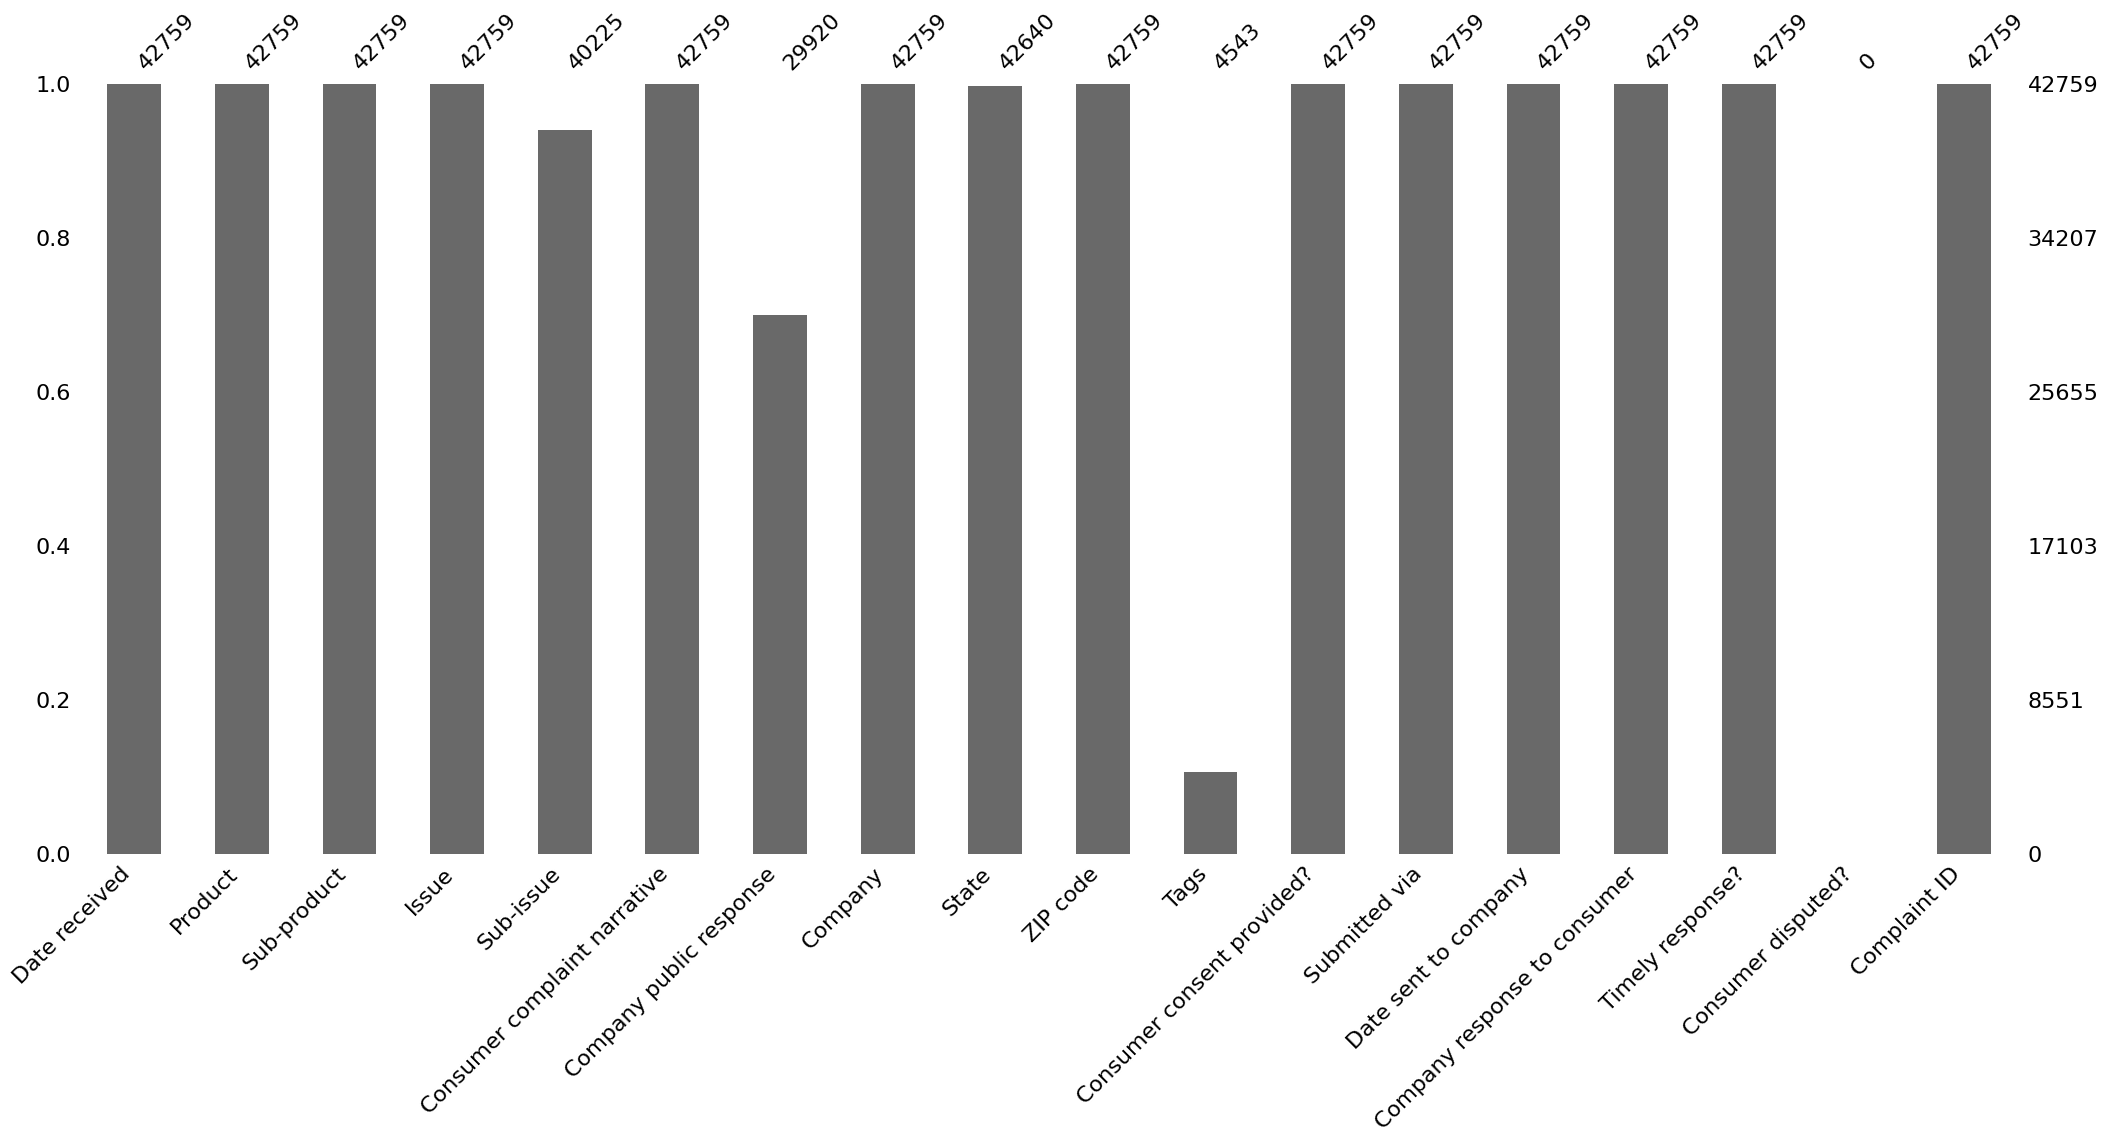

In [83]:
msno.bar(df)

In [84]:
import string
from collections import Counter
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [87]:
def initial_clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['initially_cleaned_text'] = df['Consumer complaint narrative'].apply(initial_clean_text)







In [88]:
from nltk import ngrams
all_tokens = [word for text in df['initially_cleaned_text'] for word in text.split()]
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

bigram_freq = Counter(bigrams).most_common(20)
trigram_freq = Counter(trigrams).most_common(20)

print("Most common bigrams:", bigram_freq)
print("Most common trigrams:", trigram_freq)


Most common bigrams: [(('xxxx', 'xxxx'), 555430), (('credit', 'report'), 24982), (('xxxx', 'xxxxxxxx'), 19323), (('xxxxxxxx', 'xxxx'), 18643), (('consumer', 'reporting'), 17712), (('reporting', 'agency'), 16522), (('xxxx', 'account'), 12805), (('credit', 'reporting'), 11974), (('usc', 'section'), 11298), (('consumer', 'report'), 10053), (('identity', 'theft'), 9659), (('xxxx', 'balance'), 8891), (('section', 'states'), 8788), (('states', 'consumer'), 8778), (('fair', 'credit'), 8746), (('reporting', 'act'), 8469), (('credit', 'bureaus'), 8280), (('balance', 'xxxx'), 7539), (('number', 'xxxx'), 7067), (('account', 'xxxx'), 6971)]
Most common trigrams: [(('xxxx', 'xxxx', 'xxxx'), 464954), (('consumer', 'reporting', 'agency'), 15846), (('xxxx', 'xxxxxxxx', 'xxxx'), 12123), (('xxxxxxxx', 'xxxx', 'xxxx'), 11800), (('xxxx', 'xxxx', 'xxxxxxxx'), 11612), (('states', 'consumer', 'reporting'), 8522), (('fair', 'credit', 'reporting'), 8507), (('credit', 'reporting', 'act'), 8424), (('xxxx', 'xxxx

In [89]:
def remove_frequent_phrases(text):
    words = text.split()
    words = [word for word in words if word not in ["xxxx", "xxxxxxxx"]]
    return " ".join(words)

df['cleaned_text'] = df['initially_cleaned_text'].apply(remove_frequent_phrases)


In [90]:
all_tokens = [word for text in df['cleaned_text'] for word in text.split()]
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

bigram_freq = Counter(bigrams).most_common(20)
trigram_freq = Counter(trigrams).most_common(20)

print("Most common bigrams:", bigram_freq)
print("Most common trigrams:", trigram_freq)


Most common bigrams: [(('credit', 'report'), 24984), (('consumer', 'reporting'), 17713), (('reporting', 'agency'), 16522), (('credit', 'reporting'), 11975), (('usc', 'section'), 11304), (('consumer', 'report'), 10053), (('identity', 'theft'), 9659), (('section', 'states'), 8795), (('states', 'consumer'), 8778), (('fair', 'credit'), 8746), (('reporting', 'act'), 8469), (('credit', 'bureaus'), 8280), (('account', 'number'), 6783), (('right', 'privacy'), 6684), (('us', 'code'), 6033), (('section', 'section'), 5851), (('written', 'instructions'), 5812), (('account', 'without'), 5714), (('without', 'written'), 5643), (('please', 'remove'), 5595)]
Most common trigrams: [(('consumer', 'reporting', 'agency'), 15846), (('states', 'consumer', 'reporting'), 8522), (('fair', 'credit', 'reporting'), 8507), (('credit', 'reporting', 'act'), 8424), (('reporting', 'agency', 'furnish'), 5442), (('usc', 'section', 'states'), 5410), (('furnish', 'account', 'without'), 5401), (('agency', 'furnish', 'accoun

# Using lemmatization to reduce words to their base/dictionary form.Initializing the WordNet Lemmatizer & then applying lemmatization to the 'cleaned_text' column and storing the result in a new 'lemmatized_text' column

In [91]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)


In [92]:
all_lemmas = [word for text in df['lemmatized_text'] for word in text.split()]
most_common_lemmas = Counter(all_lemmas).most_common(20)

print("\nMost common lemmas:")
for lemma, count in most_common_lemmas:
    print(f"{lemma}: {count}")



Most common lemmas:
account: 87752
credit: 77593
report: 60854
consumer: 60422
information: 58568
reporting: 45782
usc: 29494
section: 28367
agency: 24562
item: 22482
right: 21193
payment: 21000
state: 20039
please: 18989
balance: 17003
also: 15942
inaccurate: 15407
date: 15375
inquiry: 15356
debt: 14756


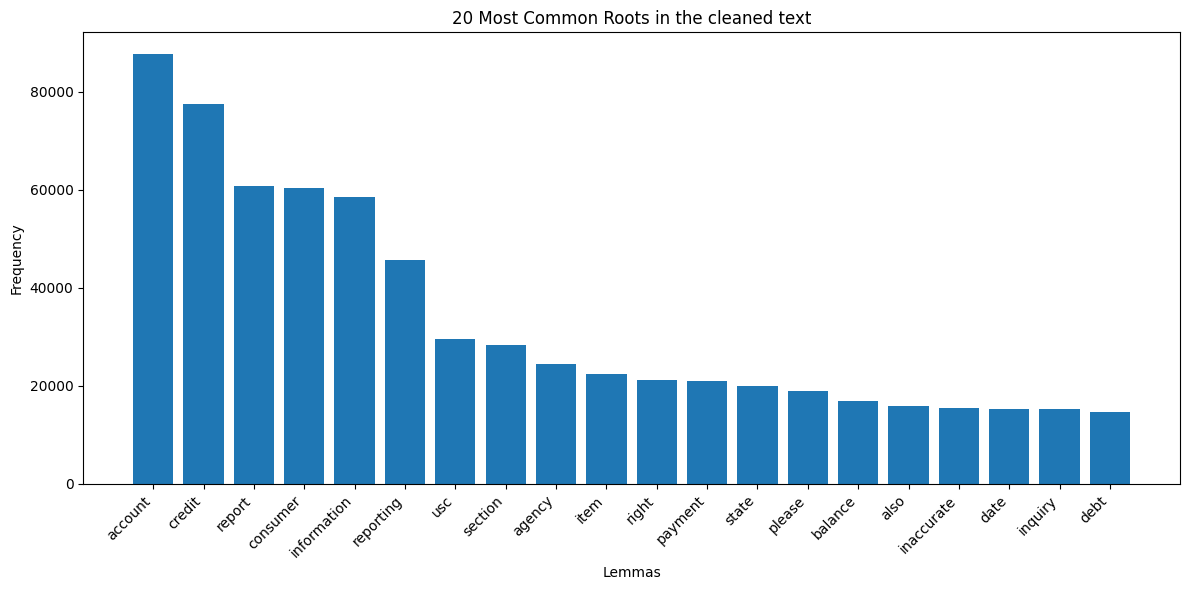

In [93]:
import matplotlib.pyplot as plt

# Assuming you've already calculated most_common_lemmas
lemmas, counts = zip(*most_common_lemmas[:20])  # Unpack the top 20 lemmas and their counts

plt.figure(figsize=(12, 6))
plt.bar(lemmas, counts)
plt.title('20 Most Common Roots in the cleaned text')
plt.xlabel('Lemmas')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Solution 2:

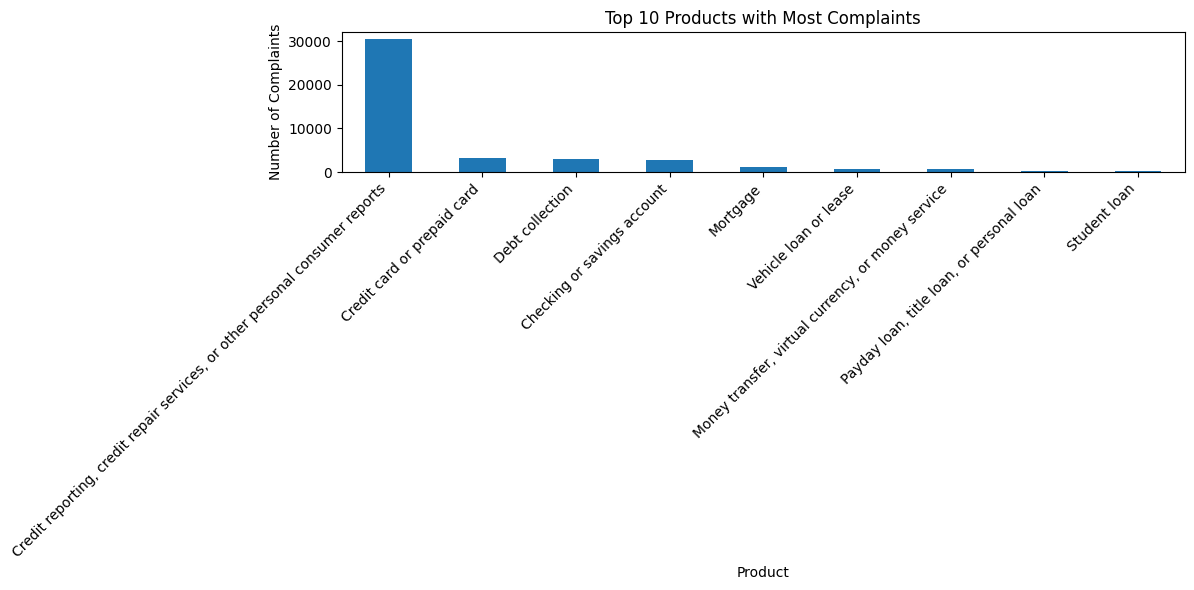

In [94]:
#Identify top 10 products

top_products = df['Product'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products with Most Complaints')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


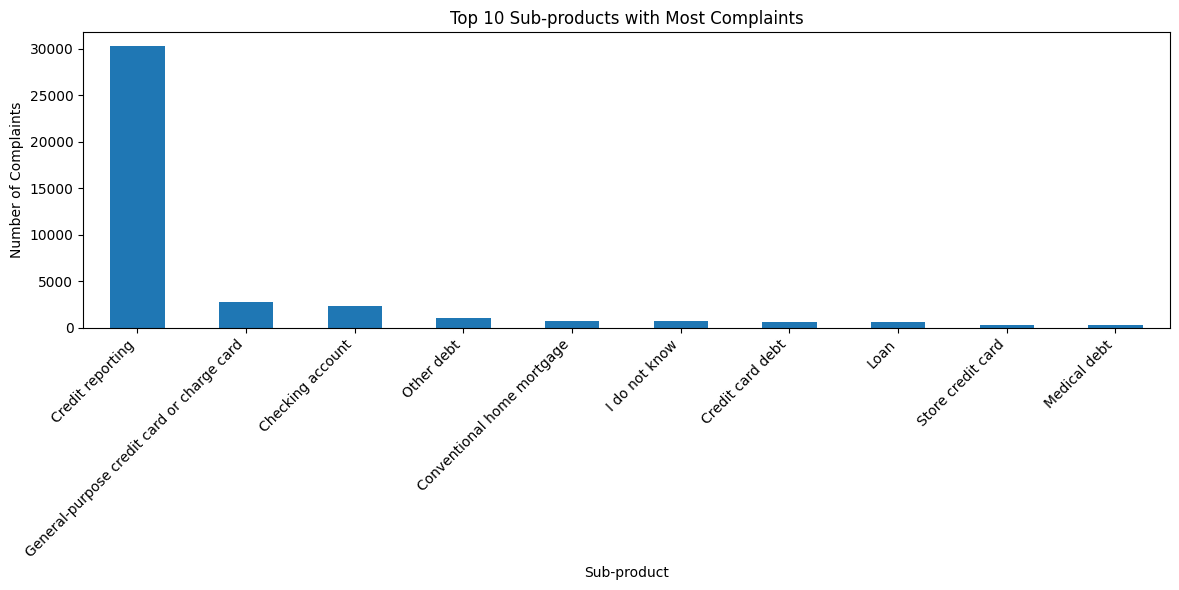

In [95]:
#Identifying top 10 sub-products
top_subproducts = df['Sub-product'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_subproducts.plot(kind='bar')
plt.title('Top 10 Sub-products with Most Complaints')
plt.xlabel('Sub-product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


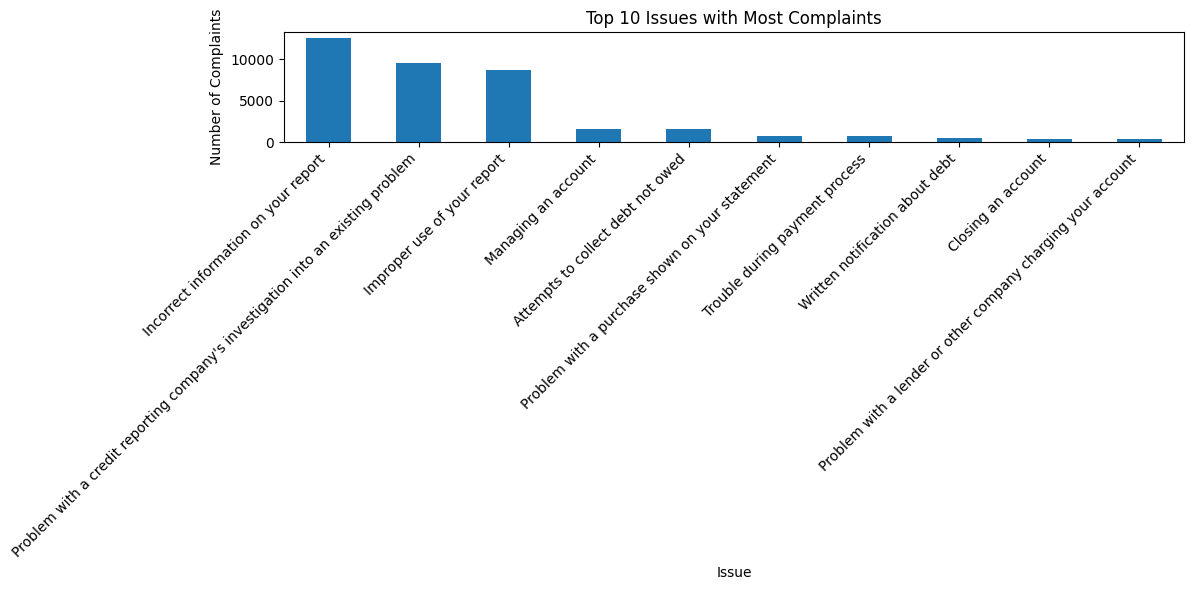

In [96]:
#Identifyinf top 10 issues:
top_issues = df['Issue'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_issues.plot(kind='bar')
plt.title('Top 10 Issues with Most Complaints')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


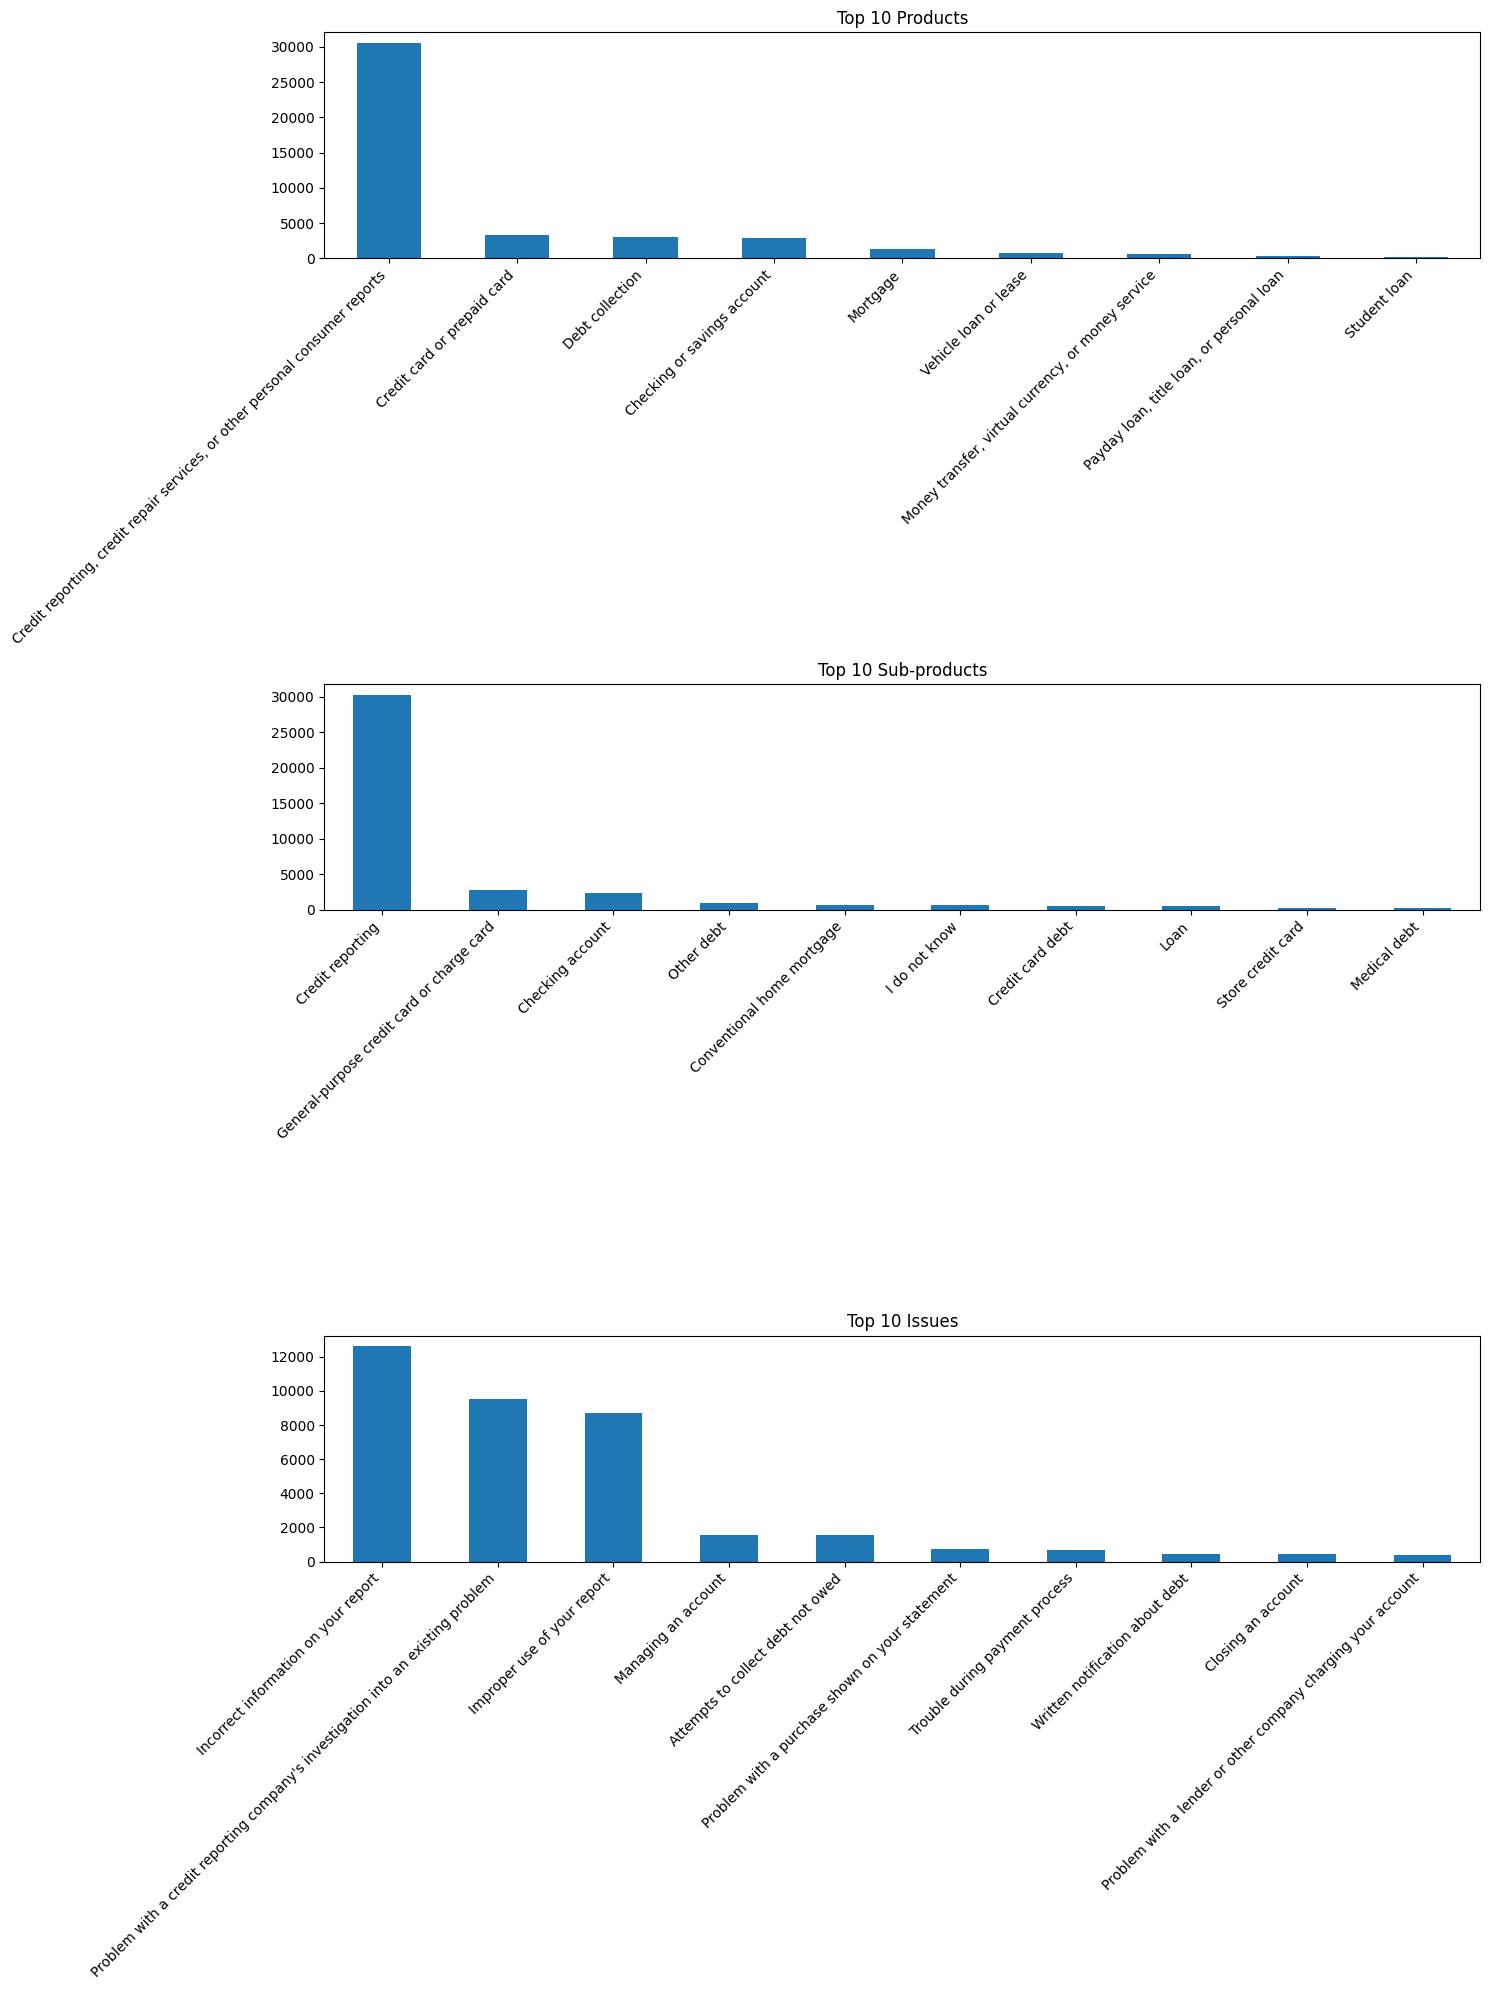

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

top_products.plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 Products')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

top_subproducts.plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 Sub-products')
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

top_issues.plot(kind='bar', ax=ax3)
ax3.set_title('Top 10 Issues')
ax3.set_xlabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


#Solution 3.1

In [98]:
# Step 3.1: Assign sentiment scores using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    vs = analyzer.polarity_scores(text)
    compound_score = vs['compound']
    if compound_score < -0.5:
        return 1
    elif compound_score < -0.1:
        return 2
    elif compound_score < 0.1:
        return 3
    elif compound_score < 0.5:
        return 4
    else:
        return 5



In [99]:
df['sentiment_score'] = df['lemmatized_text'].apply(get_sentiment_score)


#Solution 3.2

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame with 'lemmatized_text' and 'sentiment_score' columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized_text'],
    df['sentiment_score'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_score']
)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
model.fit(X_train_vectors, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, zero_division=0))

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Identify top words for each sentiment rating
feature_importance = np.abs(model.coef_)
for sentiment_score in range(1, 6):
    top_word_indices = feature_importance[sentiment_score-1].argsort()[-10:][::-1]
    top_words = feature_names[top_word_indices]

    print(f"\nSentiment Score: {sentiment_score}")
    print(f"Top Words: {', '.join(top_words)}")

    # Display sample complaints
    sample_complaints = df[df['sentiment_score'] == sentiment_score]['lemmatized_text'].sample(2)
    print("\nExample Complaints:")
    for complaint in sample_complaints:
        print(f"- {complaint}\n")


print("\nComments on results:")
print("1. The top words for each sentiment score appear to be relevant to that sentiment level.")
print("2. The example complaints generally align with their assigned sentiment scores.")
print("3. The model's accuracy suggests it's performing reasonably well in predicting sentiment.")
print("4. Some words might require further investigation to understand their context and impact on sentiment prediction.")
print("5. The progression of words from lower to higher sentiment scores seems logical and reflects different aspects of customer complaints.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7670
              precision    recall  f1-score   support

           1       0.77      0.89      0.82      2179
           2       0.77      0.61      0.68      1428
           3       0.74      0.43      0.54       648
           4       0.72      0.51      0.60      1322
           5       0.78      0.94      0.85      2975

    accuracy                           0.77      8552
   macro avg       0.76      0.68      0.70      8552
weighted avg       0.76      0.77      0.75      8552


Sentiment Score: 1
Top Words: credit, violated, fraud, negative, dispute, fraudulent, failed, violation, debt, complaint

Example Complaints:
- made several attempt address issue fraudulent inaccurate misleading item appearing consumer report item significant impact life caused immense stress want emphasize never authorized information associated name victim identity theft

- according fcra completely violated right consumer im requesting legal action remove late payment indicator expedit

The complaints for sentiment score 1 contain strongly negative language and mentions of fraud and violations, which aligns well with the lowest sentiment rating. In contrast, complaints for score 5 often mention requests for corrections or explanations, suggesting a more neutral or potentially resolvable issue, which reasonably corresponds to a higher sentiment score. The progression of complaint content from score 1 to 5 generally shows a trend from more severe, negative issues to more neutral or potentially positive interactions, which appears reasonable for this sentiment scale

#solution 4

In [125]:
import os
import time
import random
import google.generativeai as genai
import pandas as pd

# Set API key manually (for testing purposes only)
os.environ["GEMINI_API_KEY"] = "I_INSERTED_MY_API_KEY_HERE"

# Configure the API
genai.configure(api_key=os.environ["GEMINI_API_KEY"])

def ask_gemini(prompt, max_retries=3, base_delay=5):
    model = genai.GenerativeModel("gemini-pro")
    safety_settings = [
        {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "block_none"},
        {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "block_none"},
        {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "block_none"},
        {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "block_none"},
    ]

    for attempt in range(max_retries):
        try:
            response = model.generate_content(prompt, safety_settings=safety_settings)
            return response.text
        except Exception as e:
            print(f"Error on attempt {attempt + 1}: {e}")
            if attempt < max_retries - 1:
                delay = base_delay * (2 ** attempt) + random.uniform(0, 1)
                print(f"Retrying in {delay:.2f} seconds...")
                time.sleep(delay)
            else:
                return f"Error processing request after {max_retries} attempts."

# Q4-1: Summarizing Complaints - IMPROVED PROMPT
print("Q4-1: Summarizing Complaints")
sample_text = df['Consumer complaint narrative'].sample(5).tolist()
for complaint in sample_text:
    print("Complaint:", complaint)
    summary_prompt = f"""
    As a consumer advocate, summarize the key issues in this complaint in 1-2 sentences.
    Identify:
    - The main problem the customer is facing.
    - The specific company or service involved.
    - The desired outcome for the customer.
    Complaint: {complaint}
    """
    summary = ask_gemini(summary_prompt)
    print("Summary:", summary)
    evaluation = ask_gemini(f"Evaluate this summary in terms of accuracy, conciseness, and informativeness: {summary}")
    print("Evaluation:", evaluation)
    print("\n")
    time.sleep(30)

# Q4-2: Identifying Customer Dissatisfaction
print("Q4-2: Identifying Customer Dissatisfaction")
low_sentiment_complaints = df[df['sentiment_score'] <= 2]['Consumer complaint narrative'].sample(5).tolist()
for complaint in low_sentiment_complaints:
    print("Complaint:", complaint)
    feedback_prompt = f"""
    As a customer service expert, analyze this complaint and:
    - Explain why the customer is dissatisfied.
    - Suggest 3 concrete steps the company can take to improve the situation and prevent similar issues in the future.
    Complaint: {complaint}
    """
    feedback = ask_gemini(feedback_prompt)
    print("Feedback and Suggestions:", feedback)
    print("\n")
    time.sleep(30)

# Q4-3: Identifying predictive words and themes
print("Q4-3: Identifying predictive words and themes")
for sentiment in range(1, 6):
    complaints_text = ' '.join(df[df['sentiment_score'] == sentiment]['lemmatized_text'].tolist())
    prompt = f"""
    Analyze this text from customer complaints with a sentiment rating of {sentiment}.
    Identify the top 5 most predictive words and the 3 most common themes associated with this sentiment level.
    Text: {complaints_text[:5000]}
    """ # Limiting to first 5000 characters to avoid token limit
    analysis = ask_gemini(prompt)
    print(f"Sentiment {sentiment} Analysis:")
    print(analysis)
    print("\n")
    time.sleep(30)


Q4-1: Summarizing Complaints
Complaint: In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681. 

Account name : XXXX  XXXX Account number:XXXX  Account name : XXXX  XXXX Account XXXX Account name : XXXX XXXX XXXX Account number:XXXX Account name : XXXX Account XXXX has violated my rights. Or list of inquiries XXXX U.S.C 1681 section 602 A. States I have the right to privacy.

15 U.S.C 1681 Section 604 A Section 2 : It also states a consumer reporting agency can not furnish a account without my written instructions 15 U.S.C 1681c. ( a ) ( 5 ) Section States : no consumer reporting agency may make any consumer report containing any of the following items of information Any other adverse item of information, other than records of convictions of crimes which antedates the report by more than seven years.

15 U.S.C. 1681s-2 ( A ) ( 1 ) A person shall not furnish any in